In [9]:
# Imports.
import pandas as pd
import numpy as np

# Graphics libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
pd.set_option('display.max_columns', None)

Useful variables.

In [11]:
possible_assignments = ['api1', 'api2', 'api3', 'api4', 'tp1', 'tp2', 'tp3', 'tp4', 'otros_trabajos', 'ed3', 'ed4']
evaluations = ['primer_parcial', 'recuperatorio_primer_parcial']
possible_submits = ['basic_lti_launch', 'discussion_topic', 'external_tool', 'media_recording', 'online_quiz', 'online_text_entry', 'online_upload']

# Loading data.

In [12]:
path_processed_data = '../data/processed/'
file_name = 'challenge_processed.csv'

data = pd.read_csv(path_processed_data + file_name, index_col=0)
data.sample()

,materia_aprobada,nota_final_materia,periodo_1-2022,integrador,primer_parcial,recuperatorio_primer_parcial,recuperatorio_segundo_parcial,segundo_parcial,evaluacion_diagnostica,api1,api1_score,api1_time_to_submit[days],api2,api2_score,api2_time_to_submit[days],api3,api3_score,api3_time_to_submit[days],api4,api4_score,api4_time_to_submit[days],ed3,ed3_score,ed3_time_to_submit[days],ed4,ed4_score,ed4_time_to_submit[days],otros_trabajos,otros_trabajos_score,tp1,tp1_score,tp1_time_to_submit[days],tp2,tp2_score,tp2_time_to_submit[days],tp3,tp3_score,tp3_time_to_submit[days],tp4,tp4_score,tp4_time_to_submit[days],basic_lti_launch_submits,discussion_topic_submits,external_tool_submits,media_recording_submits,online_quiz_submits,online_text_entry_submits,online_upload_submits
1af1b877-02ad-47b8-b1af-0bdc9eee9b4c/315d9355-3583-4e8a-8a25-6677140a11d7,1,9.0,1,-1,9,-1,-1,9,-1,1,100.0,21.3,1,100.0,32.1,1,100.0,46.2,0,0.0,0.0,-1,0.0,-1.0,-1,0.0,-1.0,0,0.0,1,85.0,26.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,3,0,0,0,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2758 entries, 01103370-3046-4bc0-a8f8-85858ec0ec88/2dd2ca01-a672-4eca-aca7-6fbc8cd01953 to ff6b6af0-b7d7-42f4-821d-afd5ee6ef9a5/f3632565-3ab8-4b7f-9ced-097ce82eb1c5
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   materia_aprobada               2758 non-null   int64  
 1   nota_final_materia             2758 non-null   float64
 2   periodo_1-2022                 2758 non-null   int64  
 3   integrador                     2758 non-null   int64  
 4   primer_parcial                 2758 non-null   int64  
 5   recuperatorio_primer_parcial   2758 non-null   int64  
 6   recuperatorio_segundo_parcial  2758 non-null   int64  
 7   segundo_parcial                2758 non-null   int64  
 8   evaluacion_diagnostica         2758 non-null   int64  
 9   api1                           2758 non-null   int64  
 10  api1_score                     2

# EDA.

First thing im going to do is to check the correlations between created variables.
Since i've created a big amount of variables im going to only see the correlation between the target variable and created variables.

<AxesSubplot:>

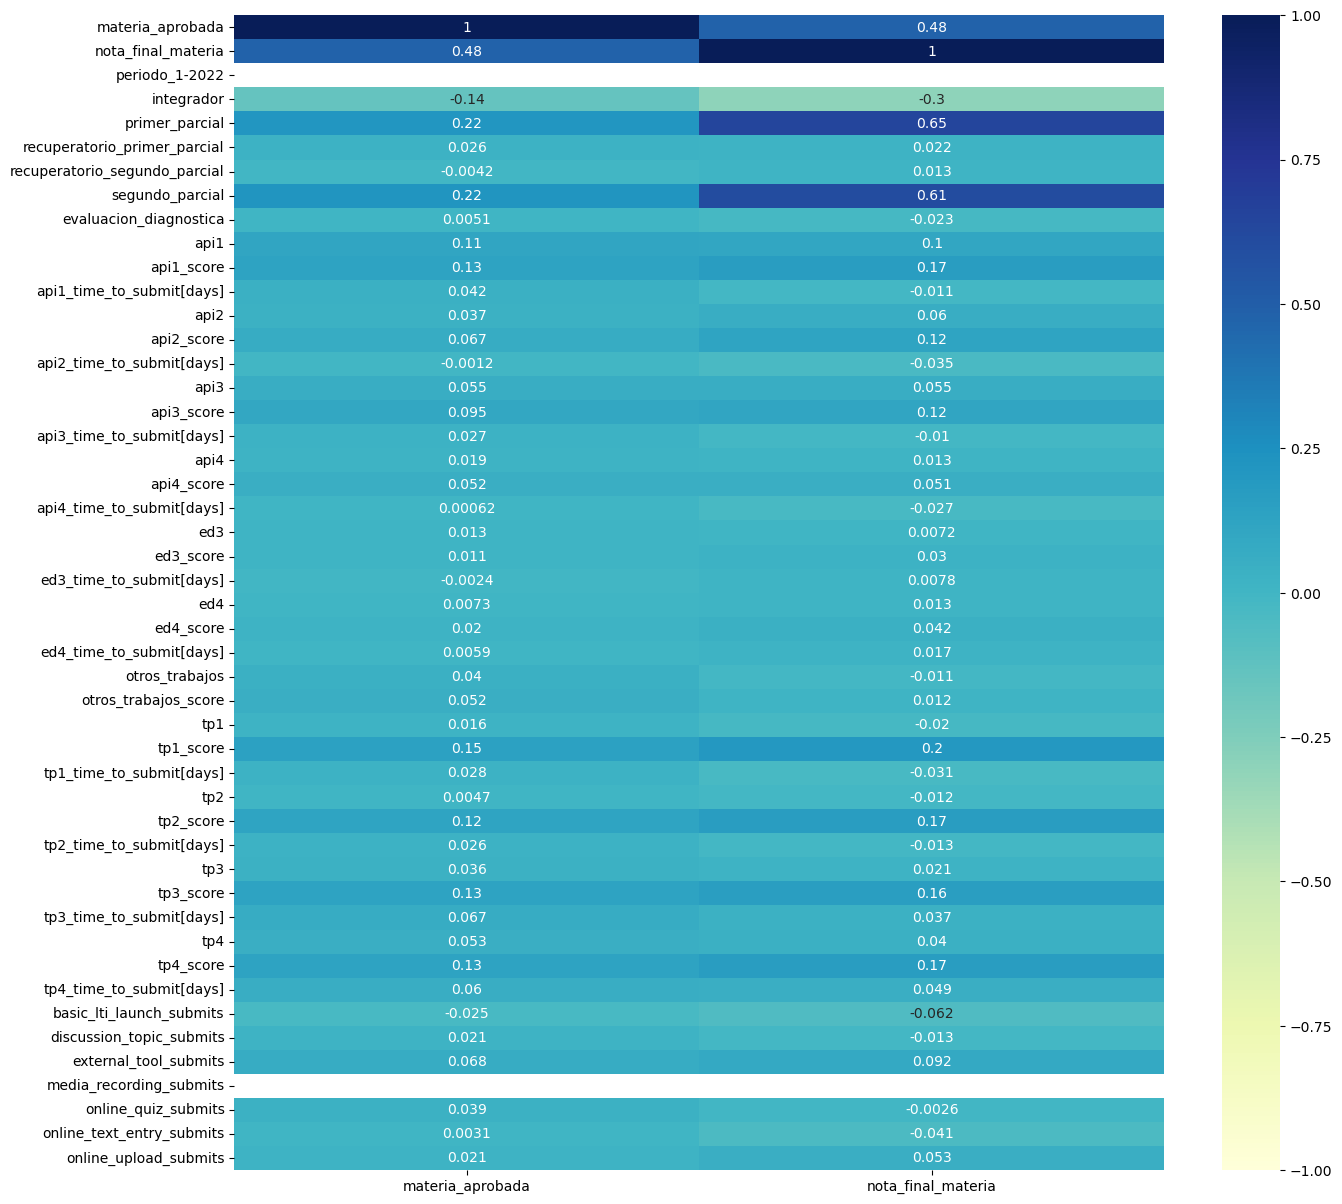

In [14]:
plt.figure(figsize=(15,15))

sns.heatmap(data.corr()[['materia_aprobada', 'nota_final_materia']], annot=True, cmap="YlGnBu", center=0, vmin=-1, vmax=1)

The strongest correlations values are where i've expected. I expected that the most higher values of correlation (in absolute value) were going to be located in those features that express an score.

We can see that evaluations has the biggest value, then followed by the assignments scores.

Even though the correlation variables in the target variable 'materia_aprobada' are not high, i believe we can observe a pattern.

## Final Score distribution.

In [15]:
fig = px.histogram(data, x='nota_final_materia',height=500, width=750)
fig.show()

Most students have a high final score in different courses.

## Final score based on assignment scores.

Now im going see how different scores varies depending on the final score of the course.

Im looking here if lower final scores have a lower assignment score, this would indicate that those variables are kinda correlated, but as we saw in the correlation matrix this is unlikely to happen.

In [16]:
# Iterating over different assesents.
for assignment in possible_assignments:
    # Keeping desired columns
    df_plot = data[['nota_final_materia', f'{assignment}_score']].copy()
    
    # Obtaining the mean for each score
    df_plot[df_plot[f'{assignment}_score'] > 0]
    df_plot = df_plot.groupby('nota_final_materia')[f'{assignment}_score'].mean()

    fig = px.bar(df_plot, x=df_plot.index, y=df_plot.values, width=750)
    
    # Update the layout - Title and Axis labels
    fig.update_layout(
        title=f'{assignment} score vs final score',
        xaxis=dict(title='Final Score'),
        yaxis=dict(title=f'{assignment} Score')
    )
    fig.show()

From here we can obtain that there are some assignments that might be important to determine if a student pass or not a course.

Those assignments are all the API and all TPs.

As for ED and 'otros_trabajos' they dont seem that they are significant.

# Final score in function of average exam score.

Im going to see now if the final score depends in the average of the two main exams ('primer y segundo parcial').

For that im going to keep the higher value between the 1st and the 2nd instance of the exams, and then adding them up and obtaining the mean.

In [17]:
df_plot = data[['nota_final_materia', 'primer_parcial', 'recuperatorio_primer_parcial','recuperatorio_segundo_parcial', 'segundo_parcial']].copy()

# Create two new columns with the maximum values
df_plot['primer_parcial_final'] = df_plot[['primer_parcial', 'recuperatorio_primer_parcial']].max(axis=1)
df_plot['segundo_parcial_final'] = df_plot[['segundo_parcial', 'recuperatorio_segundo_parcial']].max(axis=1)

# Calculate the mean of the sum of higher values
df_plot['promedio_parciales'] = df_plot[['primer_parcial_final', 'segundo_parcial_final']].mean(axis=1)

df_plot = df_plot[df_plot['promedio_parciales'] > 0]
df_plot = df_plot.groupby('nota_final_materia')['promedio_parciales'].mean()

fig = px.bar(df_plot, x=df_plot.index, y=df_plot.values, width=750)
    
# Update the layout - Title and Axis labels
fig.update_layout(
    title=f'Average exams score vs final score',
    xaxis=dict(title='Final Score'),
    yaxis=dict(title=f'Exam Score')
)
fig.show()

Here we can observe that the average of the scores between exams its really important for a student in order to pass or not a course.

Theres a strange behavior when the final score is 4, the mean of evaluation scores goes up a bit, and then in normalize so it continue ascending, with the final score.

### 'Integrador' and 'evaluacion diagnostica'.

In [18]:
df_plot = data[['nota_final_materia', 'integrador']].copy()
# Ignoring -1 values.
df_plot = data[df_plot['integrador'] > -1]

df_plot = df_plot.groupby('nota_final_materia')['integrador'].mean()

fig = px.bar(df_plot, x=df_plot.index, y=df_plot.values, width=750)
    
# Update the layout - Title and Axis labels
fig.update_layout(
    title=f'Integrador score vs final score',
    xaxis=dict(title='Final Score'),
    yaxis=dict(title=f'Integrador Score')
)
fig.show()

In [19]:
df_plot = data[['nota_final_materia', 'evaluacion_diagnostica']].copy()
# Ignoring -1 values.
df_plot = data[df_plot['evaluacion_diagnostica'] > -1]

df_plot = df_plot.groupby('nota_final_materia')['evaluacion_diagnostica'].mean()

fig = px.bar(df_plot, x=df_plot.index, y=df_plot.values, width=750)
    
# Update the layout - Title and Axis labels
fig.update_layout(
    title=f'Evaluacion Diagnostica vs final score',
    xaxis=dict(title='Final Score'),
    yaxis=dict(title=f'Evaluacion Diagnostica Score')
)
fig.show()

'Integrador' exam seems to follow the same order as the main evaluations.

As for 'Evaluacion Diagnostica' it doesnt seems to be important to decide if a student pass or not a course.

# Does assignment time to submit impacts on its score?

Im going to see if the time that takes a student to submit an assignment impacts directly on its score.

In [20]:
for assignment in possible_assignments:
    if assignment == 'otros_trabajos':
        continue
    df_plot = data[[f'{assignment}_score', f'{assignment}_time_to_submit[days]']]
    df_plot = df_plot.groupby(f'{assignment}_score')[f'{assignment}_time_to_submit[days]'].mean().reset_index()

    # Create quantiles based on f'{assignment}_score' column
    df_plot['quantiles'] = pd.qcut(df_plot[f'{assignment}_score'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['0-25', '25-50', '50-75', '75-100'])
    df_plot = df_plot.groupby('quantiles')[f'{assignment}_time_to_submit[days]'].mean()

    fig = px.bar(df_plot, x=df_plot.index, y=df_plot.values, width=750)
        
    # Update the layout - Title and Axis labels
    fig.update_layout(
        title=f'Impact in time to submit vs assignment score - {assignment}',
        xaxis=dict(title=f'{assignment} score'),
        yaxis=dict(title=f'Time to submit [days]')
    )
    fig.show()

The time that demands a student to submit an assignment doesnt seems to be really impactful in the score that the student received.

The time to submit an assignment seems to be the almost equal disregarding the score, for different assignments.

# Type of submissions.

Going to check if the type of submissions is related to the final score.

In [21]:
# Selecting Cols
submits_col = [item + '_submits' for item in possible_submits]
# Since i have the possible submits, ill target them, but i need to append the final score columns.
submits_col.append('nota_final_materia')

# Selecting cols.
df_plot = data[submits_col].copy()
# Removing final score col.
submits_col.remove('nota_final_materia')

# Obtaining the total amount of submits for each score.
df_plot = df_plot.groupby('nota_final_materia')[submits_col].sum().reset_index()

# Melt the DataFrame
df_plot = pd.melt(df_plot, id_vars=['nota_final_materia'], var_name='submit_type', value_name='submit_count')
df_plot = df_plot.groupby(['nota_final_materia', 'submit_type']).sum().reset_index()

fig = px.bar(df_plot, x='nota_final_materia', y='submit_count', color='submit_type')#, barmode='group')
        
# Update the layout - Title and Axis labels
fig.update_layout(
    title=f'Final score ',
    xaxis=dict(title=f'Final score'),
    yaxis=dict(title=f'Total amount of submits')
)
fig.show()


It seems that the most amount of submit types are around 7 and 8.